# Insuarance Fraud Prediction.

In [618]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [628]:
df=pd.read_csv('fraud_claims.csv')
df.replace('0',np.nan,inplace=True)
df['authorities_contacted']=df['authorities_contacted'].fillna('Other')
to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','age','total_claim_amount','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_relationship','authorities_contacted','months_as_customer','incident_hour_of_the_day','property_claim','umbrella_limit','policy_deductable','capital-gains', 'capital-loss',]
df.drop(to_drop,inplace=True,axis=1)

In [632]:
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']
X_new=X.select_dtypes(include=['object'])
df_X=pd.get_dummies(X_new,drop_first=True)
df_X_int=X.select_dtypes(include=['int64'])
X=pd.concat([df_X_int,df_X],axis=1)
# # X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3) 

In [652]:
# df_num= X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',  
#        'capital-gains', 'capital-loss', 'incident_hour_of_the_day',  
#        'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',  
#        'vehicle_claim']]
# sc=StandardScaler()
# scaled_data=sc.fit_transform(df_num)
# scaled_df_num=pd.DataFrame(data=scaled_data,columns=df_num.columns,index=X_train.index)
# X_train.drop(columns=scaled_df_num.columns,inplace=True)
# X_train=pd.concat([scaled_df_num,X_train],axis=1)
df_num= X[['number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim',   
       'vehicle_claim']]
sc=StandardScaler()
scaled_data=sc.fit_transform(df_num)
scaled_df_num=pd.DataFrame(data=scaled_data,columns=df_num.columns,index=X.index)
X.drop(columns=scaled_df_num.columns,inplace=True)
X=pd.concat([scaled_df_num,X],axis=1)
X_train_new,X_test_new,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3) 
X_train_new.shape
pf=PolynomialFeatures(degree=3)
X_train=pf.fit_transform(X_train_new)
X_test=pf.fit_transform(X_test_new)
X_train.shape

(700, 969)

In [653]:
# SVM Model
model=SVC(kernel='rbf',random_state=1)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_svm=accuracy_score(y_test,test_predict)
score_svm1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Support Vector Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Support Vector Classifier is : {accuracy_score(y_test,test_predict)}")  

Training accuracy of Support Vector Classifier is : 0.8514285714285714
Test accuracy of Support Vector Classifier is : 0.75


In [654]:
# KNN Model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_knn=accuracy_score(y_test,test_predict)
score_knn1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of KNN Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of KNN Classifier is : {accuracy_score(y_test,test_predict)}")  

Training accuracy of KNN Classifier is : 0.8428571428571429
Test accuracy of KNN Classifier is : 0.71


In [657]:
# Decision Tree Model
# for i in range(2,9):
#     model=DecisionTreeClassifier(max_depth=i,random_state=1)
#     model.fit(X_train,y_train)
#     print(i)
#     test_predict=model.predict(X_test)
#     train_predict=model.predict(X_train) 
#     print(f"Training accuracy of Support Vector Classifier is : {accuracy_score(y_train,train_predict)}")  
#     print(f"Test accuracy of Support Vector Classifier is : {accuracy_score(y_test,test_predict)}") 
#     print('----------------------------------------------------')
model=DecisionTreeClassifier(max_depth=7,random_state=1)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train) 
score_decision=accuracy_score(y_test,test_predict)
score_decision1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Decision Tree Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Decision Tree Classifier is : {accuracy_score(y_test,test_predict)}") 

Training accuracy of Decision Tree Classifier is : 0.9114285714285715
Test accuracy of Decision Tree Classifier is : 0.7833333333333333


In [661]:
# Random Forest Model
# for i in range(2,10):
#     model=RandomForestClassifier(n_estimators=500,max_depth=i,random_state=1)
#     model.fit(X_train,y_train)
#     test_predict=model.predict(X_test)
#     train_predict=model.predict(X_train)
#     print(f"Training accuracy of Support Vector Classifier is : {accuracy_score(y_train,train_predict)}")  
#     print(f"Test accuracy of Support Vector Classifier is : {accuracy_score(y_test,test_predict)}")  
model=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=1)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_random=accuracy_score(y_test,test_predict)
score_random1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Random Forest Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Random Forest Classifier is : {accuracy_score(y_test,test_predict)}") 

Training accuracy of Random Forest Classifier is : 0.95
Test accuracy of Random Forest Classifier is : 0.7933333333333333


In [664]:
# Extra Trees Classifier Model
# for i in range(2,10):
#     model=ExtraTreesClassifier(max_depth=i,random_state=1)
#     model.fit(X_train,y_train)
#     test_predict=model.predict(X_test)
#     train_predict=model.predict(X_train)
#     print(f"Training accuracy of Support Vector Classifier is : {accuracy_score(y_train,train_predict)}")  
#     print(f"Test accuracy of Support Vector Classifier is : {accuracy_score(y_test,test_predict)}")  
model=ExtraTreesClassifier(max_depth=9,random_state=1)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_extra=accuracy_score(y_test,test_predict)
score_extra1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Extra Tree Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Extra Tree Classifier is : {accuracy_score(y_test,test_predict)}")  

Training accuracy of Extra Tree Classifier is : 0.9171428571428571
Test accuracy of Extra Tree Classifier is : 0.7766666666666666


In [665]:
# Logistic Regression Model
model=LogisticRegression()
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_logistics=accuracy_score(y_test,test_predict)
score_logistics1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Logistic Regression Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Logistic Regression Classifier is : {accuracy_score(y_test,test_predict)}")  

Training accuracy of Logistic Regression Classifier is : 0.9342857142857143
Test accuracy of Logistic Regression Classifier is : 0.72


In [666]:
models=pd.DataFrame({'Model':['SVM','KNN','Decision Tree','Random Forest','Extra Tree Classifier','Logistic Regression'],
'Score':[score_svm,score_knn,score_decision,score_random,score_extra,score_logistics]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.793333
2,Decision Tree,0.783333
4,Extra Tree Classifier,0.776667
0,SVM,0.750000
5,Logistic Regression,0.720000
1,KNN,0.710000


In [667]:
models1=pd.DataFrame({'Model':['SVM','KNN','Decision Tree','Random Forest','Extra Tree Classifier','Logistic Regression'],
'Score':[score_svm1,score_knn1,score_decision1,score_random1,score_extra1,score_logistics1]})
models1.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.950000
5,Logistic Regression,0.934286
4,Extra Tree Classifier,0.917143
2,Decision Tree,0.911429
0,SVM,0.851429
1,KNN,0.842857


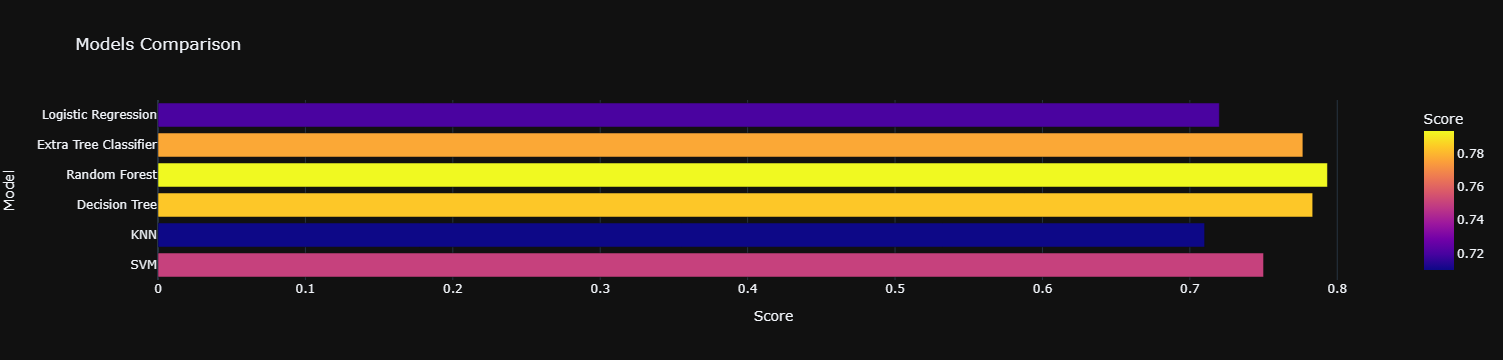

In [668]:
import plotly.express as px
px.bar(data_frame=models,x='Score',y='Model',color='Score',template='plotly_dark',title='Models Comparison')

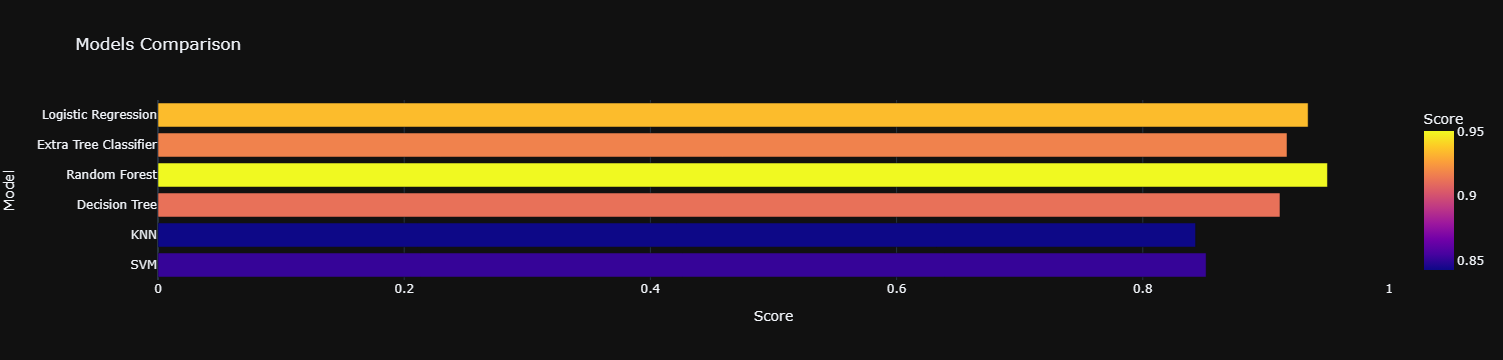

In [669]:
px.bar(data_frame=models1,x='Score',y='Model',color='Score',template='plotly_dark',title='Models Comparison')

In [746]:
df=pd.read_csv('fraud_claims.csv')
df.replace('0',np.nan,inplace=True)
df['authorities_contacted']=df['authorities_contacted'].fillna('Other')
to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','age','total_claim_amount','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_relationship','authorities_contacted','months_as_customer','incident_hour_of_the_day','property_claim','umbrella_limit','policy_deductable','capital-gains', 'capital-loss',]
df.drop(to_drop,inplace=True,axis=1)
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']
X_new=X.select_dtypes(include=['object'])
df_X=pd.get_dummies(X_new,drop_first=True)
df_X_int=X.select_dtypes(include=['int64'])
X=pd.concat([df_X_int,df_X],axis=1)
df_final=X.head(1)
df_num= X[['number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim',   
       'vehicle_claim']]
sc=StandardScaler()
scaled_data=sc.fit_transform(df_num)
scaled_df_num=pd.DataFrame(data=scaled_data,columns=df_num.columns,index=X.index)
X.drop(columns=scaled_df_num.columns,inplace=True)
X=pd.concat([scaled_df_num,X],axis=1)
X_train_new,X_test_new,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3) 
pf=PolynomialFeatures(degree=3)
X_train=pf.fit_transform(X_train_new)
X_test=pf.fit_transform(X_test_new)


# Random Forest Model
model=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=1)
model.fit(X_train,y_train)
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)
score_random=accuracy_score(y_test,test_predict)
score_random1=accuracy_score(y_train,train_predict)
print(f"Training accuracy of Random Forest Classifier is : {accuracy_score(y_train,train_predict)}")  
print(f"Test accuracy of Random Forest Classifier is : {accuracy_score(y_test,test_predict)}")  

Training accuracy of Random Forest Classifier is : 0.9314285714285714
Test accuracy of Random Forest Classifier is : 0.8266666666666667


In [751]:
input=[3,2,2,93,63280,'Single Vehicle Collision','Other','Total Loss',True,True]
# input=['Albania','Soybeans',1485.0,121.00,16.37]
categorical_col=input[5:8]
input_df=pd.DataFrame({'number_of_vehicles_involved':input[0],'bodily_injuries':input[1],'witnesses':input[2],'injury_claim':input[3],'vehicle_claim':input[4]},index=[0])
inp_df=pd.DataFrame({'property_damage_YES':input[-2],'police_report_available_YES':input[-1]},index=[0])
input_df1=df_final
input_df1=input_df1.iloc[:,5:14]
def update_columns(df, true_columns):
    df[true_columns] = True
    other_columns = df.columns.difference(true_columns)
    df[other_columns] = False
    return df
true_columns = [f'incident_type_{categorical_col[0]}',f'collision_type_{categorical_col[1]}',f'incident_severity_{categorical_col[2]}']
input_df2= update_columns(input_df1, true_columns)
final_df=pd.concat([input_df,input_df2,inp_df],axis=1)
df_num= final_df[['number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim','vehicle_claim']]
scaled_data=sc.transform(df_num)
scaled_df_num=pd.DataFrame(data=scaled_data,columns=df_num.columns,index=final_df.index)
final_df.drop(columns=scaled_df_num.columns,inplace=True)
final_df=pd.concat([scaled_df_num,final_df],axis=1)
k=pf.transform(final_df)
model.predict(k)

array(['N'], dtype=object)